170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50
196/196 [==============================] - 13s 58ms/step - loss: 0.6391 - val_loss: 0.6210
Epoch 2/50
196/196 [==============================] - 10s 51ms/step - loss: 0.6133 - val_loss: 0.6086
Epoch 3/50
196/196 [==============================] - 9s 46ms/step - loss: 0.6043 - val_loss: 0.6009
Epoch 4/50
196/196 [==============================] - 9s 45ms/step - loss: 0.5984 - val_loss: 0.5963
Epoch 5/50
196/196 [==============================] - 9s 48ms/step - loss: 0.5933 - val_loss: 0.5969
Epoch 6/50
196/196 [==============================] - 10s 51ms/step - loss: 0.5906 - val_loss: 0.5899
Epoch 7/50
196/196 [==============================] - 9s 46ms/step - loss: 0.5883 - val_loss: 0.5880
Epoch 8/50
196/196 [==============================] - 9s 46ms/step - loss: 0.5869 - val_loss: 0.5888
Epoch 9/50
196/196 [==============================] - 9s 47ms/step - loss: 0.5859 - val_loss: 0.5865
Epoch 10/50
196/196 [

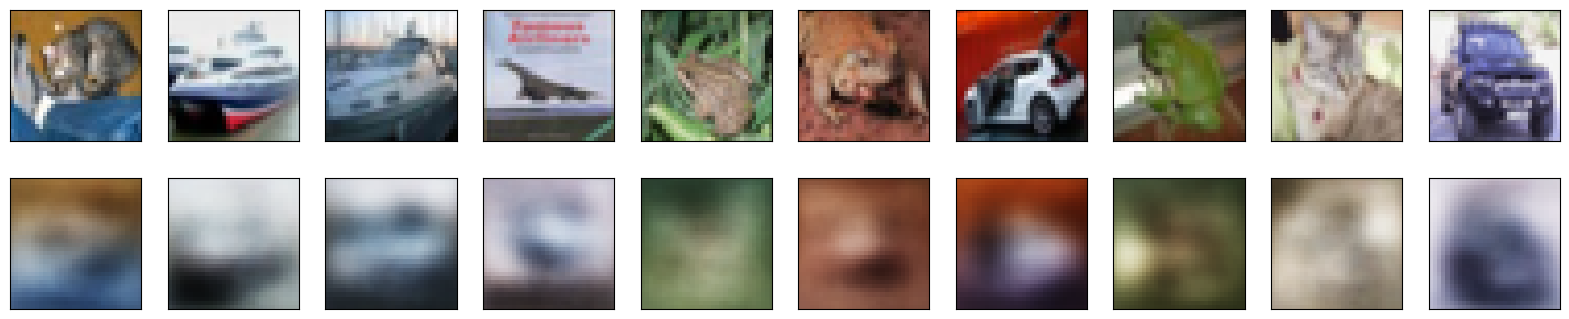

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 128  # Size of the encoded representations
input_img = Input(shape=(3072,))  # 32x32x3 images flattened
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
